<a href="https://colab.research.google.com/github/jpherrerap/qosf-screening/blob/main/QOSF_screening_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime

In [ ]:
!pip install pylatexenc scipy matplotlib

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error)

## Decomposition

Here we construct our own quantum circuit that gives the following vector.

In [ ]:
size = 5
state_values = [22,17,27,12]
state_vector = [0]*2**size
for s in state_values:
   print(np.binary_repr(s,size))
   state_vector[s] = 0.5
np.asarray(state_vector)


10110
10001
11011
01100


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0. , 0. , 0. ])

In [ ]:
Statevector(np.asarray(state_vector)).draw('latex')

<IPython.core.display.Latex object>

```
0 1 1 1
1 0 0 1
1 0 1 0
0 0 1 1
0 1 0 1
```



In [ ]:
xqc = QuantumCircuit(1)
xqc.x(0)
xqc.h(0)
Statevector(xqc).draw('latex')

<IPython.core.display.Latex object>

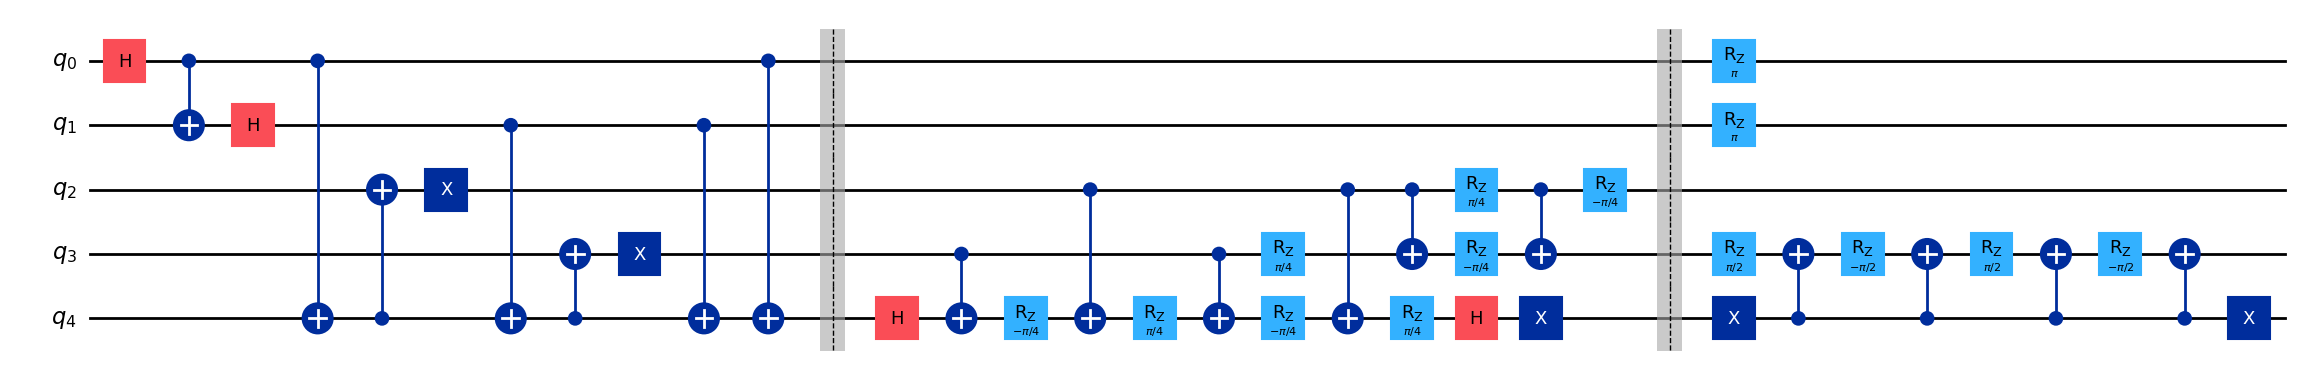

In [ ]:
my_qc = QuantumCircuit(5)

my_qc.h(0)
my_qc.cx(0, 1)
my_qc.h(1)

# We can derive a logical relation of the bits by hand

# Set q2 = NOT q0
# First copy q0 into q4 (since q4 is |0⟩), then into q2 and apply X gate
my_qc.cx(0, 4)
my_qc.cx(4, 2)
my_qc.x(2)

# Set q3 = NOT ( CNOT (1, 4))
# CX q1 and q4, then "copy" to q3 and apply X gate
my_qc.cx(1, 4)
my_qc.cx(4, 3)
my_qc.x(3)


# my_qc.cx(1, 3)
# Reverse the operations on q4
my_qc.cx(1, 4)
my_qc.cx(0, 4)

# Set q4 = NOT ( AND (q2, q3))
# This is harder to do, but possible with 6 CNOTS
# This is inspired by https://www.semanticscholar.org/paper/On-the-CNOT-cost-of-TOFFOLI-gates-Shende-Markov/c7011bd2c3eb2dbd4e8879ffb9803dc221c17c09
my_qc.barrier()
# my_qc.ccx(3, 2, 4)
my_qc.h(4)

my_qc.cx(3, 4)
my_qc.rz(-np.pi/4, 4)
my_qc.cx(2, 4)
my_qc.rz(np.pi/4, 4)

my_qc.cx(3, 4)
my_qc.rz(np.pi/4, 3)
my_qc.rz(-np.pi/4, 4)
my_qc.cx(2, 4)
my_qc.rz(np.pi/4, 4)

my_qc.h(4)

my_qc.cx(2, 3)
my_qc.rz(-np.pi/4, 3)
my_qc.rz(np.pi/4, 2)
my_qc.cx(2, 3)
my_qc.rz(-np.pi/4, 2)

my_qc.x(4)
my_qc.barrier()

# We still have a negative sign in one of the amplitudes, we can fix that with some RZ and CNOT gates
my_qc.rz(np.pi, 0)
my_qc.rz(np.pi, 1)

my_qc.rz(np.pi/2, 3)
my_qc.x(4)
my_qc.cx(4, 3)
my_qc.rz(-np.pi/2, 3)
my_qc.cx(4, 3)
my_qc.rz(np.pi/2, 3)
my_qc.cx(4, 3)
my_qc.rz(-np.pi/2, 3)
my_qc.cx(4, 3)
my_qc.x(4)


## Unfortunately we still have a global phase
## An idea to negate this is to use crz gates, and decompose them into rz and cx
# my_qc.x(0)
# my_qc.crz(np.pi / 4, 0, 1)
# my_qc.crz(np.pi / 4, 0, 2)
# my_qc.crz(np.pi / 4, 0, 3)
# my_qc.crz(np.pi / 4, 0, 4)
# my_qc.x(0)
# my_qc.global_phase = -15*np.pi/8


# Statevector(my_qc).draw('latex')
my_qc.draw('mpl', fold=-1)

In [ ]:
Statevector(my_qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
Statevector(np.asarray(state_vector)).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
my_qc = QuantumCircuit(5)
for i in range(5):
    my_qc.h(i)
my_qc.draw('mpl')

In [ ]:
my_qc.depth()

29